#Initialise

In [1]:
!apt-get update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 32.6 MB/s 


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [3]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

#Import modules

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns 
%matplotlib inline
sns.set()
import pyspark.ml

#Loading data

In [5]:
# Loading the data
data = spark.read.csv('/content/train.csv', header=True, inferSchema=True)

#Type of Data

In [6]:
type(data)

pyspark.sql.dataframe.DataFrame

#Statistical Info

In [7]:
data.show()

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F| 0-17|        10|            A|                         2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F| 0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F| 0-17|        10|            A|                         2|             0|                12|              null|              null|    1422

In [8]:
data.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



#Datatype info

In [9]:
data.dtypes

[('User_ID', 'int'),
 ('Product_ID', 'string'),
 ('Gender', 'string'),
 ('Age', 'string'),
 ('Occupation', 'int'),
 ('City_Category', 'string'),
 ('Stay_In_Current_City_Years', 'string'),
 ('Marital_Status', 'int'),
 ('Product_Category_1', 'int'),
 ('Product_Category_2', 'int'),
 ('Product_Category_3', 'int'),
 ('Purchase', 'int')]

In [10]:
print('Data frame describe (string and numeric columns only):')
data.describe().toPandas().T

Data frame describe (string and numeric columns only):


,0,1,2,3,4
summary,count,mean,stddev,min,max
User_ID,550068,1003028.8424013031,1727.5915855313747,1000001,1006040
Product_ID,550068,None,None,P00000142,P0099942
Gender,550068,None,None,F,M
Age,550068,None,None,0-17,55+
Occupation,550068,8.076706879876669,6.522660487341741,0,20
City_Category,550068,None,None,A,C
Stay_In_Current_City_Years,550068,1.468494139793958,0.9890866807573103,0,4+
Marital_Status,550068,0.40965298835780306,0.4917701263173315,0,1
Product_Category_1,550068,5.404270017525106,3.936211369201365,1,20


In [11]:
data.toPandas().isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [12]:
data.groupBy('Purchase').count().show()

+--------+-----+
|Purchase|count|
+--------+-----+
|   11458|   57|
|    3794|   26|
|   15957|   28|
|    7880|  134|
|    2122|   32|
|    8086|  151|
|    9852|   89|
|    7982|  160|
|    5300|  131|
|   11858|   48|
|    8592|   98|
|    8638|  109|
|   15447|   88|
|    5156|  103|
|   15619|   77|
|   10817|   17|
|   15846|   70|
|   12046|   52|
|    9900|  106|
|    3997|   35|
+--------+-----+
only showing top 20 rows



In [13]:
df = data.select('User_ID','Product_ID','Gender', 'Age', 'Occupation','City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3','Purchase')

#Exploratory Data Analysis

In [14]:
purch= data.select(['Purchase']).toPandas()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


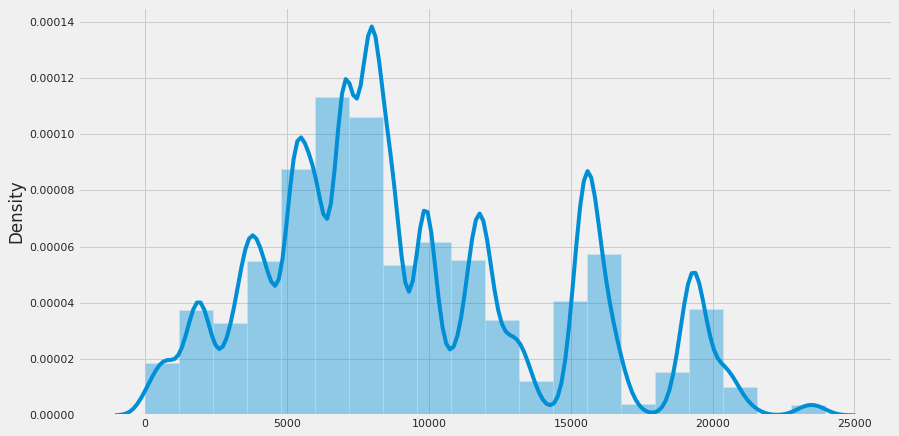

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(purch, bins=20)

If we consider as a whole it is almost forming a uniform distribution

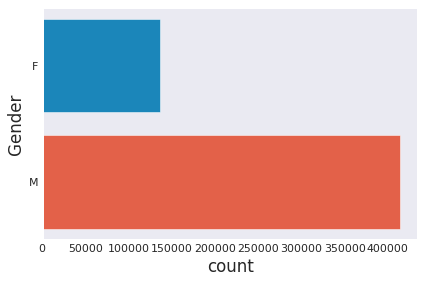

In [16]:
sns.set_style('dark')
sns.countplot(y='Gender', data=df.toPandas())

In this dataset most of the purchasers are Male in the Black Friday Sale

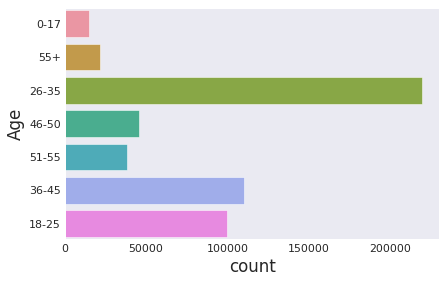

In [17]:
sns.set_style('dark')
sns.countplot(y='Age', data=df.toPandas())

Maximum purchases is done by youth people belonging to the age group between 26-35 since black friday sales mostly deals with gadgets.

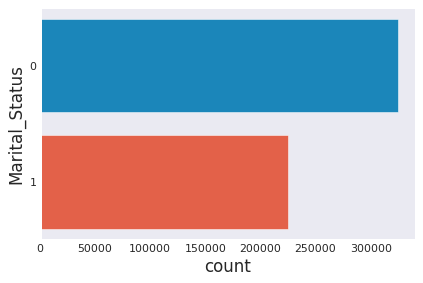

In [18]:
sns.set_style('dark')
sns.countplot(y='Marital_Status', data=df.toPandas())

Majority of the customers maritial staus is single.

#Bivariate Analysis

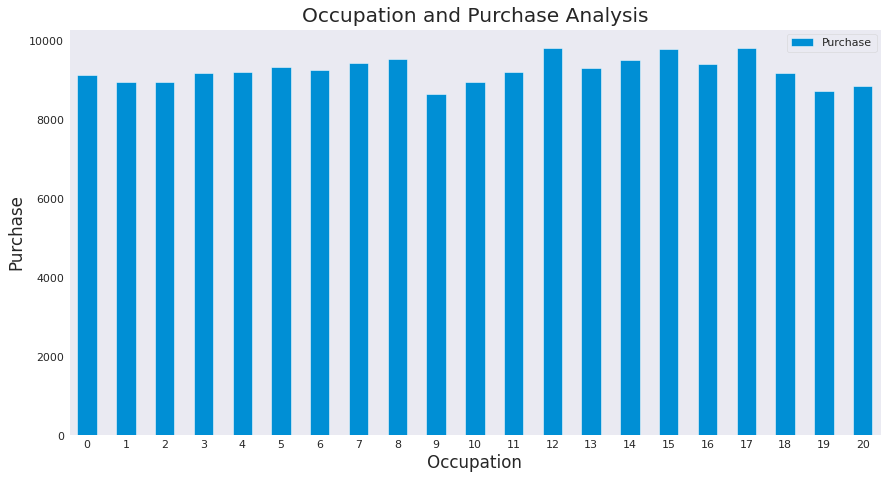

In [19]:
occupation_plot = df.toPandas().pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

All the categories are purchasing in average manner, the mean is in uniform distribution.

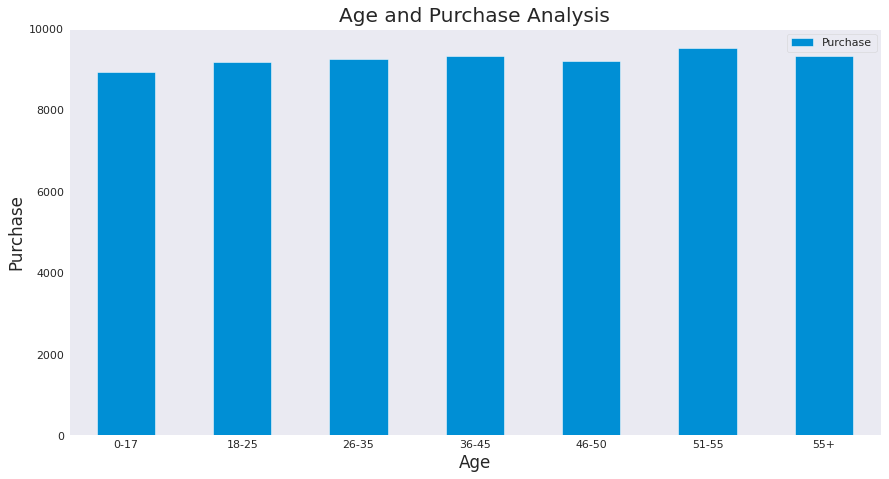

In [20]:
age_plot = df.toPandas().pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Here also most of the categories in uniform manner.

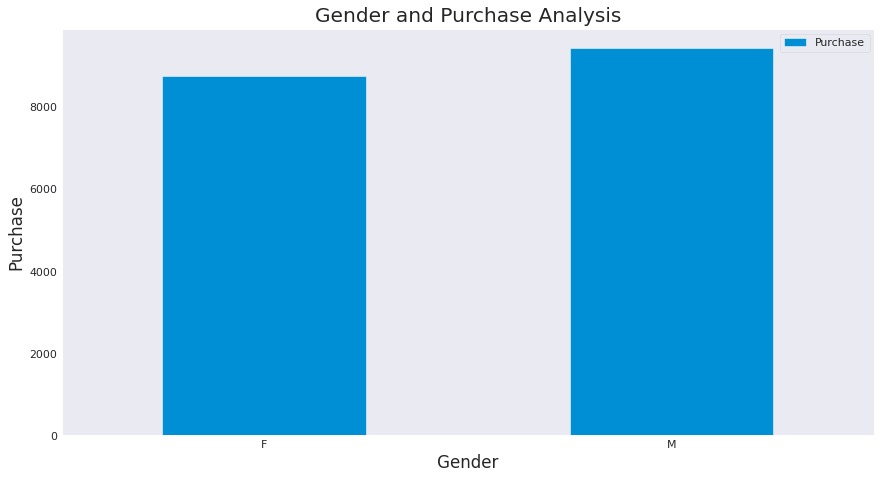

In [21]:
gender_plot = df.toPandas().pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Here there is a slight difference in the purchase pattern amongst males and females.

#Data Preprocessing

In [22]:
from pyspark.ml.feature import VectorAssembler,StringIndexer

In [23]:
ageEncoder = StringIndexer(inputCol='Age',outputCol='age1').fit(data)
data = ageEncoder.transform(data)


In [24]:
city_type = StringIndexer(inputCol='City_Category',outputCol='City_class').fit(data)
data = city_type.transform(data)


In [25]:
sex1 = StringIndexer(inputCol='Gender',outputCol='sex').fit(data)
data = sex1.transform(data)


In [26]:
data.show(10)

+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+----+----------+---+
|User_ID|Product_ID|Gender|  Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|age1|City_class|sex|
+-------+----------+------+-----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+----+----------+---+
|1000001| P00069042|     F| 0-17|        10|            A|                         2|             0|                 3|              null|              null|    8370| 6.0|       2.0|1.0|
|1000001| P00248942|     F| 0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200| 6.0|       2.0|1.0|
|1000001| P00087842|     F| 0-17|        10|            A|       

In [27]:
data1= data.toPandas().iloc[:,[12,13, 14, 4, 7, 8, 11]]

In [28]:
data1.head(5)

,age1,City_class,sex,Occupation,Marital_Status,Product_Category_1,Purchase
0,6.0,2.0,1.0,10,0,3,8370
1,6.0,2.0,1.0,10,0,1,15200
2,6.0,2.0,1.0,10,0,12,1422
3,6.0,2.0,1.0,10,0,12,1057
4,5.0,1.0,0.0,16,0,8,7969


In [29]:
spark_data= spark.createDataFrame(data1)

In [48]:
vector2 = ['age1','City_class', 'sex','Occupation',	'Marital_Status',	'Product_Category_1','Purchase']

In [49]:
vector = VectorAssembler(inputCols=vector2,outputCol='features_new')

In [50]:
vect = vector.transform(spark_data)

#Train Test Process

In [51]:
train_df,test_df = vect.randomSplit([0.7,0.3])

#Modelling

In [52]:
from pyspark.ml.regression import LinearRegression

In [53]:
lr = LinearRegression(featuresCol='features_new',labelCol="Purchase", maxIter=10, regParam=0.3, elasticNetParam=0.8)
# Fit the data to the model
linearModel = lr.fit(train_df)
